# Stations near North Carolina

In [1]:
import pandas as pd
from seebuoy import NDBC

## Initialize class and get all stations

In [2]:
ndbc = NDBC()
df_stations = ndbc.stations()
df_stations.head(2)

,station_id,owner,ttype,hull,name,payload,location,timezone,forecast,note,lat_lon,lat,lon,closest_city,closest_state,ownercode,ownername,countrycode
0,00922,DU,Slocum Glider,NaN,OTN201 - 4800922,NaN,"30.000 N 90.000 W (30&#176;0'0"" N 90&#176;0'0"" W)",E,,NaN,30.000 N 90.000 W,30.000,-90.0,New Orleans,Louisiana,DU,Dalhousie University,CA
1,00923,DU,Slocum Glider,NaN,OTN200 - 4800923,NaN,"30.000 N 90.000 W (30&#176;0'0"" N 90&#176;0'0"" W)",E,,NaN,30.000 N 90.000 W,30.000,-90.0,New Orleans,Louisiana,DU,Dalhousie University,CA


## Subset to NC stations

In [3]:
m = df_stations["closest_state"] == "North Carolina"
df_nc = df_stations[m]

print(df_nc.shape)
df_nc.head(2)

(30, 18)


,station_id,owner,ttype,hull,name,payload,location,timezone,forecast,note,lat_lon,lat,lon,closest_city,closest_state,ownercode,ownername,countrycode
153,41002,N,3-meter foam buoy,3D66,SOUTH HATTERAS - 225 NM South of Cape Hatteras,SCOOP payload,"31.759 N 74.936 W (31&#176;45'33"" N 74&#176;56...",E,FZNT22.KWBC,Right whales are active off SC from November t...,31.759 N 74.936 W,31.759,-74.936,Wilmington,North Carolina,N,NDBC,US
158,41007,N,3-meter discus buoy,NaN,NaN,DACT payload,"34.200 N 76.500 W (34&#176;12'0"" N 76&#176;30'...",E,,NaN,34.200 N 76.500 W,34.200,-76.5,Jacksonville,North Carolina,N,NDBC,US


## Get available data

In [4]:
df_available = ndbc.available_data(dataset="all")

# subset down to north carolina stations
m = df_available["station_id"].isin(df_nc["station_id"])
df_nc_avail = df_available[m]

print(df_nc_avail.shape)
df_nc_avail.head(2)

(46, 10)


,file_name,last_modified,size,description,station_id,dataset_code,dataset,url,txt_url,timeframe
59,41002.data_spec,2023-01-01 21:35,1.0M,Raw Spectral Wave Data,41002,data_spec,spectral_summary,realtime2/41002.data_spec,https://www.ndbc.noaa.gov/data/realtime2/41002...,real_time
60,41002.spec,2023-01-01 21:35,106K,Spectral Wave Summary Data,41002,spec,raw_spectral,realtime2/41002.spec,https://www.ndbc.noaa.gov/data/realtime2/41002...,real_time


## Summarize available data

In [5]:
piv_nc = pd.pivot_table(
    df_nc_avail, 
    index="station_id", 
    columns="dataset", 
    aggfunc=len, 
    values="file_name"
)

piv_nc.fillna('-')

dataset,adcp,oceanographic,raw_spectral,spectral_alpha1,spectral_alpha2,spectral_r1,spectral_r2,spectral_summary,standard,supplemental
station_id,,,,,,,,,,
41002,-,-,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
41013,-,-,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
41024,-,1.0,-,-,-,-,-,-,1.0,-
41037,-,1.0,-,-,-,-,-,-,1.0,-
41038,-,1.0,-,-,-,-,-,-,1.0,-
41064,-,1.0,-,-,-,-,-,-,1.0,-
41108,1.0,-,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-
41110,-,-,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-
41159,-,-,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-


## Get oceanographic data for 41024

In [6]:
df_ocean = ndbc.get_data("41024", dataset="oceanographic")
df_ocean.head(2)

,depth,ocean_temp,conductivity,salinity,dissolved_o2_perc,dissolved_o2_ppm,cholorophyll,turbidity,ph,redox
date,,,,,,,,,,
2022-11-15 00:08:00,0.0,18.85,NaN,36.01,NaN,NaN,NaN,NaN,NaN,NaN
2022-11-15 01:08:00,0.0,18.78,NaN,36.03,NaN,NaN,NaN,NaN,NaN,NaN


## Visualize

<AxesSubplot: xlabel='date'>

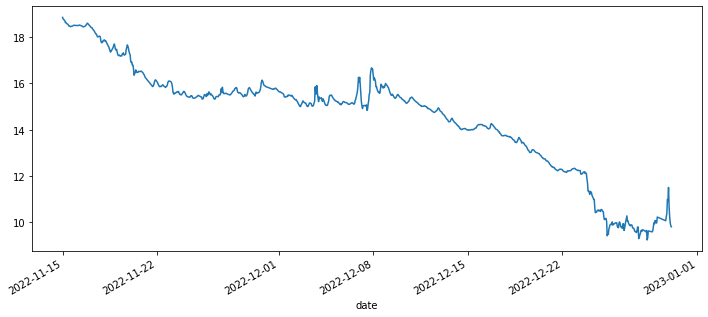

In [7]:
df_ocean["ocean_temp"].plot(figsize=(12,5))

## Get standard data for 41002

In [8]:
df_standard = ndbc.get_data("41002", dataset="standard")
df_standard.head(2)

,wind_direction,wind_speed,wind_gust,wave_height,dominant_period,average_period,mean_wave_direction,pressure,air_temp,water_temp,dewpoint,visibility,pressure_tendency,tide
date,,,,,,,,,,,,,,
2022-11-17 00:00:00,220.0,7.0,9.0,NaN,NaN,NaN,NaN,1014.9,25.0,24.4,23.9,NaN,0.4,NaN
2022-11-17 00:10:00,220.0,7.0,8.0,NaN,NaN,NaN,NaN,1014.7,25.0,24.4,23.9,NaN,NaN,NaN


## Visualize

<AxesSubplot: xlabel='date'>

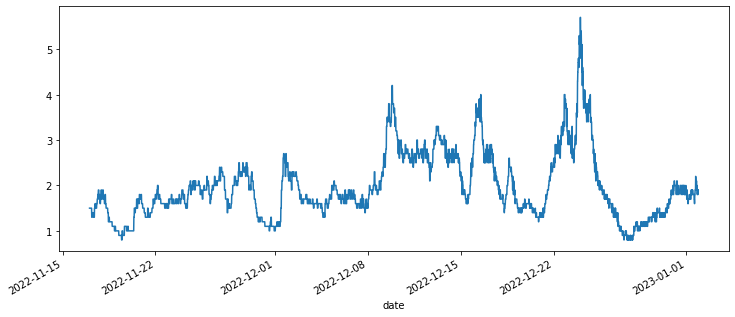

In [9]:
df_standard["wave_height"].ffill().plot(figsize=(12,5))